# Data Preparation for a Machine Learning Trading Strategy

## Loading and Preparing the Data

In [1]:
# Import required libraries
import pandas as pd
from pathlib import Path

In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
trading_df = pd.read_csv(
    Path("../Resources/ohlcv.csv"), 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

# Display sample data
trading_df.head()

C:\Users\pablo\AppData\Local\Temp\ipykernel_38100\2215118500.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  trading_df = pd.read_csv(
C:\Users\pablo\AppData\Local\Temp\ipykernel_38100\2215118500.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trading_df = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2018-10-19 09:30:00,16.90,17.18,16.90,17.095,11522
2018-10-19 09:45:00,17.11,17.44,17.11,17.400,70593
2018-10-19 10:00:00,17.40,17.40,17.25,17.280,38885
2018-10-19 10:15:00,17.27,17.27,17.18,17.200,37046
2018-10-19 10:30:00,17.21,17.37,17.19,17.200,46874


In [3]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["close"].pct_change()

# Display sample data
trading_df.head()

,open,high,low,close,volume,actual_returns
date,,,,,,
2018-10-19 09:30:00,16.90,17.18,16.90,17.095,11522,NaN
2018-10-19 09:45:00,17.11,17.44,17.11,17.400,70593,0.017841
2018-10-19 10:00:00,17.40,17.40,17.25,17.280,38885,-0.006897
2018-10-19 10:15:00,17.27,17.27,17.18,17.200,37046,-0.004630
2018-10-19 10:30:00,17.21,17.37,17.19,17.200,46874,0.000000


In [4]:
# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,open,high,low,close,volume,actual_returns
date,,,,,,
2018-10-19 09:45:00,17.11,17.44,17.11,17.40,70593,0.017841
2018-10-19 10:00:00,17.40,17.40,17.25,17.28,38885,-0.006897
2018-10-19 10:15:00,17.27,17.27,17.18,17.20,37046,-0.004630
2018-10-19 10:30:00,17.21,17.37,17.19,17.20,46874,0.000000
2018-10-19 10:45:00,17.20,17.20,17.10,17.12,11266,-0.004651


,open,high,low,close,volume,actual_returns
date,,,,,,
2020-09-04 14:45:00,6.225,6.26,6.220,6.250,55512,0.003210
2020-09-04 15:00:00,6.255,6.27,6.245,6.250,65810,0.000000
2020-09-04 15:15:00,6.250,6.29,6.250,6.275,202630,0.004000
2020-09-04 15:30:00,6.270,6.28,6.250,6.255,130140,-0.003187
2020-09-04 15:45:00,6.250,6.28,6.250,6.250,190278,-0.000799


## Generating the Features and Target Sets

### Creating the Features Set

In [5]:
# Define a window size of 4
short_window = 4

# Create an SMA that uses short_window, and assign it to a new column named “sma_fast”
trading_df["sma_fast"] = trading_df["close"].rolling(window=short_window).mean()

In [6]:
# Define a window size of 100
long_window = 100

# Create an SMA that uses long_window, and assign it to a new columns named “sma_slow”
trading_df["sma_slow"] = trading_df["close"].rolling(window=long_window).mean()

In [7]:
# Drop the NaNs using dropna()
trading_df = trading_df.dropna()
trading_df

,open,high,low,close,volume,actual_returns,sma_fast,sma_slow
date,,,,,,,,
2018-10-24 15:00:00,15.660,15.66,15.600,15.615,80027,-0.002874,15.65250,16.34030
2018-10-24 15:15:00,15.630,15.66,15.520,15.530,76449,-0.005443,15.61875,16.32160
2018-10-24 15:30:00,15.540,15.54,15.180,15.410,137468,-0.007727,15.55375,16.30290
2018-10-24 15:45:00,15.410,15.42,15.350,15.350,688995,-0.003894,15.47625,16.28440
2018-10-25 09:30:00,15.550,15.55,15.205,15.320,44387,-0.001954,15.40250,16.26560
...,...,...,...,...,...,...,...,...
2020-09-04 14:45:00,6.225,6.26,6.220,6.250,55512,0.003210,6.22875,6.27030
2020-09-04 15:00:00,6.255,6.27,6.245,6.250,65810,0.000000,6.23875,6.26985
2020-09-04 15:15:00,6.250,6.29,6.250,6.275,202630,0.004000,6.25125,6.26910


In [8]:
# Assign a copy of the `sma_fast` and `sma_slow` columns to a new DataFrame called `X`
X = trading_df[["sma_fast", "sma_slow"]].shift().dropna().copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
date,,
2018-10-24 15:15:00,15.65250,16.3403
2018-10-24 15:30:00,15.61875,16.3216
2018-10-24 15:45:00,15.55375,16.3029
2018-10-25 09:30:00,15.47625,16.2844
2018-10-25 09:45:00,15.40250,16.2656


,sma_fast,sma_slow
date,,
2020-09-04 14:45:00,6.22625,6.27210
2020-09-04 15:00:00,6.22875,6.27030
2020-09-04 15:15:00,6.23875,6.26985
2020-09-04 15:30:00,6.25125,6.26910
2020-09-04 15:45:00,6.25750,6.26855


### Creating the Target Set

In [9]:
# Create a new column in the `trading_df` called "signal" setting its value to zero.
trading_df["signal"] = 0

In [10]:
# Create the signal to buy
trading_df.loc[(trading_df["actual_returns"] >=0), "signal"] = 1


In [11]:
# Create the signal to sell
trading_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1


In [12]:
trading_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11969 entries, 2018-10-24 15:00:00 to 2020-09-04 15:45:00
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            11969 non-null  float64
 1   high            11969 non-null  float64
 2   low             11969 non-null  float64
 3   close           11969 non-null  float64
 4   volume          11969 non-null  int64  
 5   actual_returns  11969 non-null  float64
 6   sma_fast        11969 non-null  float64
 7   sma_slow        11969 non-null  float64
 8   signal          11969 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 935.1 KB


In [13]:
X.head()

,sma_fast,sma_slow
date,,
2018-10-24 15:15:00,15.65250,16.3403
2018-10-24 15:30:00,15.61875,16.3216
2018-10-24 15:45:00,15.55375,16.3029
2018-10-25 09:30:00,15.47625,16.2844
2018-10-25 09:45:00,15.40250,16.2656


In [14]:
# Copy the new "signal" column to a new Series called `y`.
y = trading_df['signal'].copy()
y

date
2018-10-24 15:00:00   -1
2018-10-24 15:15:00   -1
2018-10-24 15:30:00   -1
2018-10-24 15:45:00   -1
2018-10-25 09:30:00   -1
                      ..
2020-09-04 14:45:00    1
2020-09-04 15:00:00    1
2020-09-04 15:15:00    1
2020-09-04 15:30:00   -1
2020-09-04 15:45:00   -1
Name: signal, Length: 11969, dtype: int64

## Split the Data into Training and Testing Sets

In [15]:
# Import required libraries
from pandas.tseries.offsets import DateOffset

In [16]:
X.head()

,sma_fast,sma_slow
date,,
2018-10-24 15:15:00,15.65250,16.3403
2018-10-24 15:30:00,15.61875,16.3216
2018-10-24 15:45:00,15.55375,16.3029
2018-10-25 09:30:00,15.47625,16.2844
2018-10-25 09:45:00,15.40250,16.2656


In [17]:
X.index.min() 

Timestamp('2018-10-24 15:15:00')

In [18]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
training_begin 

Timestamp('2018-10-24 15:15:00')

In [19]:
# Select the ending period for the training data with an offset of  months
training_end = X.index.min() + DateOffset(months = 18)

# Display the training end date
training_end

Timestamp('2020-04-24 15:15:00')

In [20]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]
X_train

,sma_fast,sma_slow
date,,
2018-10-24 15:15:00,15.65250,16.34030
2018-10-24 15:30:00,15.61875,16.32160
2018-10-24 15:45:00,15.55375,16.30290
2018-10-25 09:30:00,15.47625,16.28440
2018-10-25 09:45:00,15.40250,16.26560
...,...,...
2020-04-24 14:15:00,7.21625,6.58510
2020-04-24 14:30:00,7.23000,6.59660
2020-04-24 14:45:00,7.24000,6.60970


In [21]:
# Generate the X_test and y_test DataFrames
X_test= X.loc[training_end:]
y_test= y.loc[training_end:]
y_test

date
2020-04-24 15:15:00   -1
2020-04-24 15:30:00    1
2020-04-24 15:45:00   -1
2020-04-24 16:00:00    1
2020-04-27 09:30:00   -1
                      ..
2020-09-04 14:45:00    1
2020-09-04 15:00:00    1
2020-09-04 15:15:00    1
2020-09-04 15:30:00   -1
2020-09-04 15:45:00   -1
Name: signal, Length: 2464, dtype: int64

## Standardize the Data

In [22]:
# Import required libraries
from sklearn.preprocessing import StandardScaler

In [23]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.96664223,  1.22783408],
       [ 0.95392897,  1.22067572],
       [ 0.92944417,  1.21351736],
       ...,
       [-2.20225649, -2.49704109],
       [-2.19896046, -2.49240921],
       [-2.19613529, -2.48787303]])

## Define ML Model

In [25]:
from sklearn import svm 
from sklearn.metrics import classification_report, f1_score

In [26]:
# Create my model
svm_model = svm.SVC()

# Fit my model 

svm_model = svm_model.fit(X_train_scaled, y_train)

# Predic my model 

training_signal_predictions = svm_model.predict(X_train_scaled)

training_signal_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
# Classification report on predicting my signal for the training

training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

          -1       0.57      0.01      0.02      4500
           1       0.53      0.99      0.69      5005

    accuracy                           0.53      9505
   macro avg       0.55      0.50      0.35      9505
weighted avg       0.55      0.53      0.37      9505



In [28]:
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [29]:
# Classification report on predicting my signal for the testing
testing_report = classification_report(y_test, testing_signal_predictions)

print(testing_report)

              precision    recall  f1-score   support

          -1       0.48      0.45      0.46      1135
           1       0.55      0.58      0.57      1329

    accuracy                           0.52      2464
   macro avg       0.52      0.52      0.52      2464
weighted avg       0.52      0.52      0.52      2464



In [30]:
# metrics.f1_score(y_test,testing_report)

In [31]:
f1_score(y_test, testing_signal_predictions,average='weighted',zero_division=0)


0.5194656334663598

In [34]:
#Visually Compare the Actual and Predicted Returns

predictions_df = pd.DataFrame(index=X_test.index)
predictions_df['predicted_signal'] = testing_signal_predictions
predictions_df['actual_returns'] = trading_df['actual_returns']
predictions_df['trading_algo_returns'] = predictions_df.actual_returns * predictions_df.predicted_signal
predictions_df

,predicted_signal,actual_returns,trading_algo_returns
date,,,
2020-04-24 15:15:00,1,-0.012380,-0.012380
2020-04-24 15:30:00,1,0.002786,0.002786
2020-04-24 15:45:00,1,-0.001389,-0.001389
2020-04-24 16:00:00,1,0.002782,0.002782
2020-04-27 09:30:00,1,-0.036061,-0.036061
...,...,...,...
2020-09-04 14:45:00,1,0.003210,0.003210
2020-09-04 15:00:00,1,0.000000,0.000000
2020-09-04 15:15:00,1,0.004000,0.004000


<Axes: xlabel='date'>

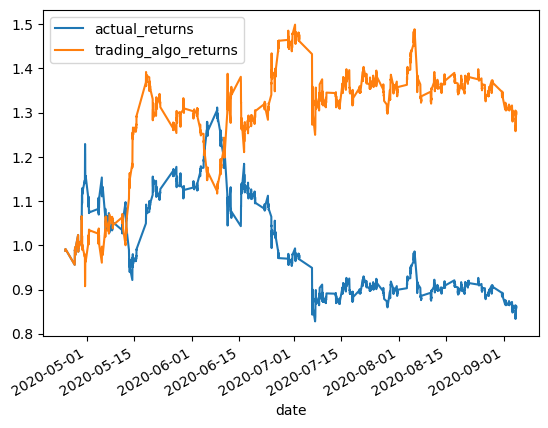

In [36]:
# Aggregation of my returns
(1 + predictions_df[['actual_returns', 'trading_algo_returns']]).cumprod().plot()